# Business Problem

The problem this report will aim to solve is to find whether big multicultural cities tend to have a similar way of developing, a common cultural scene and common preferences of the people living there. 

Analyzing the clustering of different venues by category one can find wether a specific type tend to be located in the center of the city or it's suburb areas. 

Analyzing the preferences of the users, conclusions about the trends in different longitude and latitudes can be made i.e whether a location of a venue would make it less or more popular if same category venues are differently located in the chosen datasets.


For the current report, the information about the already explored cities will be used - New York and Toronto.

New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. At its core is Manhattan, a densely populated borough that’s among the world’s major commercial, financial and cultural centers. With an estimated 2018 population of 8,398,748 distributed over a land area of about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States. According to the latest census data it is the only one of the top five  biggest cities in the US in which each of the four major racial and ethnic groups makesup at least 10 percent of the population. It is also a relatively young city with most of the population being at age between 18 and 55.

Toronto on the other hand is the capital of the province of Ontario, a major Canadian city along Lake Ontario’s northwestern shore. It is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. Toronto covers an area of 630 square kilometres (243 sq miles) with many green spaces, from the orderly oval of Queen’s Park to 400-acre High Park and its trails, sports facilities and zoo. It has a population of over 2.93 millions and people from over 250 ethnicities and 16 countries are represented in the Toronto.


# Data

### 0. Import necessary libraries

In [ ]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

### 1. Data for New York - from the dataset provided in Module/Week 3

In [6]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print ('Done')

Done


In [7]:
import json
import pandas as pd

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
nw_data = newyork_data['features']

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
nw_df = pd.DataFrame(columns=column_names)
for data in nw_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nw_df = nw_df.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
nw_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
nw_df.shape

(306, 4)

### Draw a map of the city and choose 2 neighborhoods - one in the center and one furthest from the center

In [9]:
address_nw = 'New York City, NY'
geolocator_nw = Nominatim(user_agent="ny_explorer")
location_nw = geolocator_nw.geocode(address_nw)
latitude_nw = location_nw.latitude
longitude_nw = location_nw.longitude

map_newyork = folium.Map(location=[latitude_nw, longitude_nw], zoom_start=10)

for lat, lng, borough, neighborhood in zip(nw_df['Latitude'], nw_df['Longitude'], nw_df['Borough'], nw_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Choosing one neighborhoods:
- in Manhattan - **Soho** 
- in Staten Island - **Butler Manor**

### 2. Data for Toronto - from the dataset created during the assignment in Module/Week 4

In [10]:
import types
import requests
import pandas as pd
from botocore.client import Config
import ibm_boto3
from bs4 import BeautifulSoup


website_html = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_html, 'lxml')
postcodes_table = soup.find('table',{'class':'wikitable sortable'})


l = []
for tr in postcodes_table.find_all('tr')[1:]:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
    

toronto_df = pd.DataFrame(l, columns=["PostalCode", "Borough", "Neighborhood"])
toronto_df.loc[toronto_df['Neighborhood'].str.contains('\n'), 'Neighborhood'] = toronto_df['Neighborhood'].str.replace('\n', '')
toronto_df = toronto_df.drop(toronto_df[toronto_df.Borough == 'Not assigned'].index)
toronto_df.loc[toronto_df['Neighborhood'] == 'Not assigned', 'Neighborhood'] = toronto_df['Borough']
aggregation_functions = {}
toronto_df = toronto_df.groupby(['PostalCode'], as_index=False).agg({'Borough': 'first', 'Neighborhood': ', '.join})
toronto_df.reset_index()


def __iter__(self): return 0

# @hidden_cell
client_add727566460447cb4943451ba9a2c4d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<<>>',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_add727566460447cb4943451ba9a2c4d.get_object(Bucket='courseraibmdatascience-donotdelete-pr-2dj0rbysng8mnt',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
geo_data_df = pd.read_csv(body)


toronto_df = pd.merge(toronto_df, geo_data_df, left_on=['PostalCode'], right_on = ['Postal Code'], how = 'left').drop('Postal Code', axis=1)
toronto_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [11]:
toronto_df.shape

(103, 5)

### Draw a map of the city and choose 2 neighborhoods - one in the center and one furthest from the center

In [12]:
address_toronto = 'Toronto'
geolocator_toronto = Nominatim(user_agent="ny_explorer")
location_toronto = geolocator_toronto.geocode(address_toronto)
latitude_toronto = location_toronto.latitude
longitude_toronto = location_toronto.longitude

map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Choosing one neighborhoods:
- in Downtown Toronto - **Commerce Court, Victoria Hotel** 
- in Etobicoke - **Northwest**

# Foursquare venues data

#### Setup the credentials

In [35]:
CLIENT_ID = '<<>>'
CLIENT_SECRET = '<<>>'
VERSION = '20180605'
VENUES_LIMIT=50
RADIUS=5000

pd.set_option('display.max_rows', None)

#### Get the data just for the selected neighborhoods in both cities

In [15]:
nw_selected = nw_df.loc[nw_df['Neighborhood'].isin(['Soho', 'Butler Manor'])]
nw_selected

,Borough,Neighborhood,Latitude,Longitude
122,Manhattan,Soho,40.722184,-74.000657
238,Staten Island,Butler Manor,40.506082,-74.229504


In [16]:
toronto_selected = toronto_df.loc[toronto_df['Neighborhood'].isin(['Commerce Court, Victoria Hotel', 'Northwest'])]
toronto_selected

,PostalCode,Borough,Neighborhood,Latitude,Longitude
61,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817
102,M9W,Etobicoke,Northwest,43.706748,-79.594054


####  Helper method for the foursquare json results

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def convert_search(json_response, neighborhood):
    venues_json_response = json_response['response']['venues']
    venues_json_array = []
    for venue_json in venues_json_response:
        venue = {}
        venue['Neighborhood'] = neighborhood
        venue['Id'] = venue_json['id']
        venue['Name'] = venue_json['name']
        venue['Latitude'] = venue_json['location']['lat']
        venue['Longitude'] = venue_json['location']['lng']
        venue['Address'] = venue_json['location']['formattedAddress']
        category_ids = map(lambda category: category['id'], venue_json['categories']) 
        category_ids_list = list(category_ids)
        category_names = map(lambda category: category['name'], venue_json['categories']) 
        category_names_list = list(category_names)
        venue['Category_id'] = '' if len(category_ids_list) == 0 else category_ids_list[0]
        venue['Category_name'] = '' if len(category_names_list) == 0 else category_names_list[0]
        venues_json_array.append(venue)
    return venues_json_array    
    

In [19]:
def get_venues_data(source_df):
    venues_df = pd.DataFrame([])
    
    for index, row in source_df.iterrows():
        lat = row['Latitude']
        long = row['Longitude']
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&intent={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            RADIUS, 
            VENUES_LIMIT,
            'browse')
        results = requests.get(url).json()
        df_current = pd.DataFrame(convert_search(results, row['Neighborhood']))    
        venues_df = venues_df.append(df_current, ignore_index=True)
        
    return venues_df

#### New York Venues

In [59]:
nw_venues = get_venues_data(nw_selected)
nw_venues.head()

,Address,Category_id,Category_name,Id,Latitude,Longitude,Name,Neighborhood
0,"[453 Broome St (at Mercer St.), New York, NY 1...",4bf58dd8d48988d106951735,Men's Store,4df167c8d22d8c5470d5058c,40.722173,-74.001111,SuitSupply,Soho
1,"[52 Mercer St Fl 5, New York, NY 10013, United...",52e81612bcbc57f1066b7a35,Club House,5991933ec0f1632f70b55347,40.721725,-74.000840,The Wing SoHo,Soho
2,"[459 Broome St (btwn Greene & Mercer St), New ...",4bf58dd8d48988d127951735,Arts & Crafts Store,4a7a06f2f964a52039e81fe3,40.722326,-74.000994,Purl Soho,Soho
3,"[504 Broadway (btwn Spring & Broome St), New Y...",4bf58dd8d48988d1f6941735,Department Store,49f75667f964a5208b6c1fe3,40.722169,-73.999216,Bloomingdale’s,Soho
4,"[490 Broadway, New York, NY 10012, United States]",4bf58dd8d48988d1f7941735,Flea Market,5d50764b52578c0007e4ebf0,40.721780,-73.999680,Artists & Fleas,Soho


#### New York Categories Legend

In [62]:
nw_venues['Category_code'] = pd.Categorical(nw_venues['Category_name']).codes
legend_nw = nw_venues[['Category_name', 'Category_code']]
legend_nw = legend_nw.drop(legend_nw[legend_nw['Category_code'] == 0].index)
legend_nw = legend_nw.groupby(['Category_code'], as_index=False).agg({'Category_name': 'first'})
legend_nw

,Category_code,Category_name
0,1,Advertising Agency
1,2,American Restaurant
2,3,Art Museum
3,4,Arts & Crafts Store
4,5,BBQ Joint
5,6,Baseball Field
6,7,Beach
7,8,Boutique
8,9,Bus Line
9,10,Café


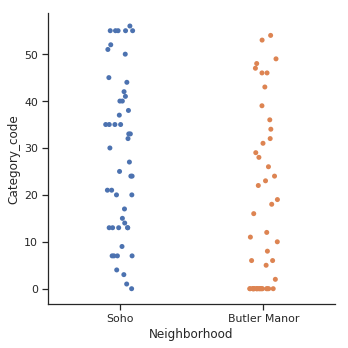

In [23]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Neighborhood", y="Category_code", data=nw_venues);

#### Toronto Venues

In [24]:
toronto_venues = get_venues_data(toronto_selected)
toronto_venues.head()

,Address,Category_id,Category_name,Id,Latitude,Longitude,Name,Neighborhood
0,"[199 Bay St (King Street), Toronto ON M5L 2W4,...",4bf58dd8d48988d1e0931735,Coffee Shop,592c5bfb31fd147e47255fb3,43.648251,-79.380127,Dineen @CommerceCourt,"Commerce Court, Victoria Hotel"
1,"[199 Bay St (at Commerce Court West, PATH Leve...",4bf58dd8d48988d176941735,Gym,501ae947e4b0d11883b910a7,43.648100,-79.379989,Equinox Bay Street,"Commerce Court, Victoria Hotel"
2,"[199 Bay St (Wellington), Toronto ON M5L 1G5, ...",4bf58dd8d48988d146941735,Deli / Bodega,4bacf405f964a520881d3be3,43.648015,-79.379907,Druxy's,"Commerce Court, Victoria Hotel"
3,"[25 King St W (btw Yonge & Bay), Toronto ON, C...",4bf58dd8d48988d10a951735,Bank,4b0c4cd3f964a520cb3a23e3,43.648252,-79.379765,CIBC - Commerce Court North,"Commerce Court, Victoria Hotel"
4,[18 Wellington St W & 21 Melinda St (at Yonge ...,4bf58dd8d48988d124941735,Office,4b834b31f964a520240131e3,43.648024,-79.378936,Commerce Court East,"Commerce Court, Victoria Hotel"


#### Toronto Categories Legend

In [34]:
toronto_venues['Category_code'] = pd.Categorical(toronto_venues['Category_name']).codes
legend_toronto = toronto_venues[['Category_name', 'Category_code']]
legend_toronto = legend_toronto.drop(legend_toronto[legend_toronto['Category_code'] == 0].index)
legend_toronto = legend_toronto.groupby(['Category_code'], as_index=False).agg({'Category_name': 'first'})
legend_toronto

,Category_code,Category_name
0,1,African Restaurant
1,2,Airport
2,3,Airport Lounge
3,4,Art Gallery
4,5,Automotive Shop
5,6,Bagel Shop
6,7,Bakery
7,8,Bank
8,9,Bar
9,10,Brewery


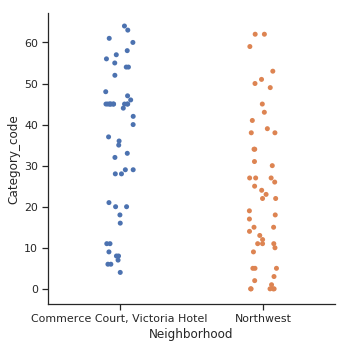

In [26]:
sns.set(style="ticks", color_codes=True)
toronto_venues['Category_code'] = pd.Categorical(toronto_venues['Category_name']).codes
sns.catplot(x="Neighborhood", y="Category_code", data=toronto_venues);

#### Compare all

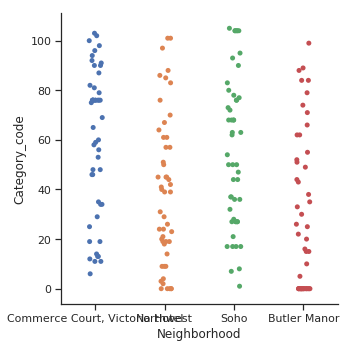

In [74]:
all_venues = toronto_venues
all_venues = all_venues.append(nw_venues)
all_venues['Category_code'] = pd.Categorical(all_venues['Category_name']).codes
all_venues = all_venues.reset_index()
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Neighborhood", y="Category_code", data=all_venues);

### Prediction example

In [129]:
import random 
import numpy as np 
import geopy.distance
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

%matplotlib inline

In [133]:
nw_center = (40.722184, -74.000657)
nw_venues['Coordinate'] = list(zip(nw_venues['Latitude'], nw_venues['Longitude']))
nw_venues['Distance'] = nw_venues['Coordinate'].apply(lambda x: geopy.distance.VincentyDistance(x, nw_center).km)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  app.launch_new_instance()


In [135]:
np.random.seed(0)

msk = np.random.rand(len(nw_venues)) < 0.8

nw_cdf = nw_venues[['Category_code', 'Distance']]
nw_train = nw_cdf[msk]
nw_test = nw_cdf[~msk]

nw_train_x = np.asanyarray(nw_train[['Distance']])
nw_train_y = np.asanyarray(nw_train[['Category_code']])

nw_test_x = np.asanyarray(nw_test[['Distance']])
nw_test_y = np.asanyarray(nw_test[['Category_code']])

nw_regression = linear_model.LinearRegression()
nw_regression.fit(nw_train_x, nw_train_y)

nw_y_hat = nw_regression.predict(nw_test_x)

print ('Coefficients: ', nw_regression.coef_)
print ('Intercept: ', nw_regression.intercept_)

print(nw_y_hat)

print("Residual sum of squares: %.2f" % np.mean((nw_y_hat - nw_test_y) ** 2))

Coefficients:  [[-0.44026931]]
Intercept:  [28.02540328]
[[27.93245805]
 [28.01592599]
 [28.01300766]
 [27.9943022 ]
 [27.99017394]
 [28.01578832]
 [27.98681067]
 [28.01839573]
 [14.47925375]
 [14.21126854]
 [14.30297282]
 [14.83380973]
 [14.28204275]
 [14.04442989]
 [14.3743097 ]]
Residual sum of squares: 364.26


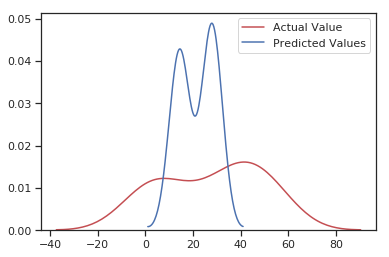

In [136]:
ax1 = sns.distplot(nw_test_y, hist=False, color="r", label="Actual Value")
sns.distplot(nw_y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [139]:
nw_poly3 = PolynomialFeatures(degree=3)
nw_train_x_poly3 = nw_poly3.fit_transform(nw_train_x)
nw_clf3 = linear_model.LinearRegression()
nw_clf3.fit(nw_train_x_poly3, nw_train_y)
nw_test_x_poly3 = nw_poly3.fit_transform(nw_test_x)
nw_test_y3_ = nw_clf3.predict(nw_test_x_poly3)

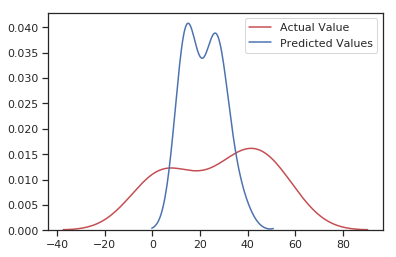

In [140]:
ax1_3 = sns.distplot(nw_test_y, hist=False, color="r", label="Actual Value")
sns.distplot(nw_test_y3_, hist=False, color="b", label="Predicted Values" , ax=ax1_3)